In [1]:
import pandas as pd
import numpy as np
import os
import csv
import seaborn as sns
sns.set_style("darkgrid")
sns.set_palette('Set1')
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression

In [2]:
concat = pd.read_csv('application_stat_comparison.csv')
first = pd.read_csv('first.csv')
second = pd.read_csv('second.csv')
third = pd.read_csv('third.csv')
fourth = pd.read_csv('fourth.csv')
fifth = pd.read_csv('fifth.csv')
na = pd.read_csv('na.csv')

In [3]:
concat.head()

,Application Status,Current DPSCD Student,Cumulative GPA,Overall Exam Score,Essay Score,Total GPA Score,Total Application Score
0,Accepted,DPSCD Applicant,3.73610,39.055924,20.0,33.0,102.055924
1,Accepted,DPSCD Applicant,3.97060,32.839648,20.0,35.0,97.839648
2,Accepted,DPSCD Applicant,3.77775,32.028559,20.0,33.0,95.028559
3,Accepted,DPSCD Applicant,3.94445,31.647674,18.0,35.0,94.647674
4,Accepted,DPSCD Applicant,3.80560,30.901489,18.0,34.0,92.901489


In [4]:
concat = concat.dropna(axis=0)

### Visualize the positive correlation between **Overall Exam Score**, **Cumulative GPA**, and **Total GPA Score** against **Total Application Score**

The black line indentifies where there is a significant *visual* difference in Total Applicantion Score between DPSCD students and non-DPSCD students

Text(0.5, 0, 'Total Application Score')

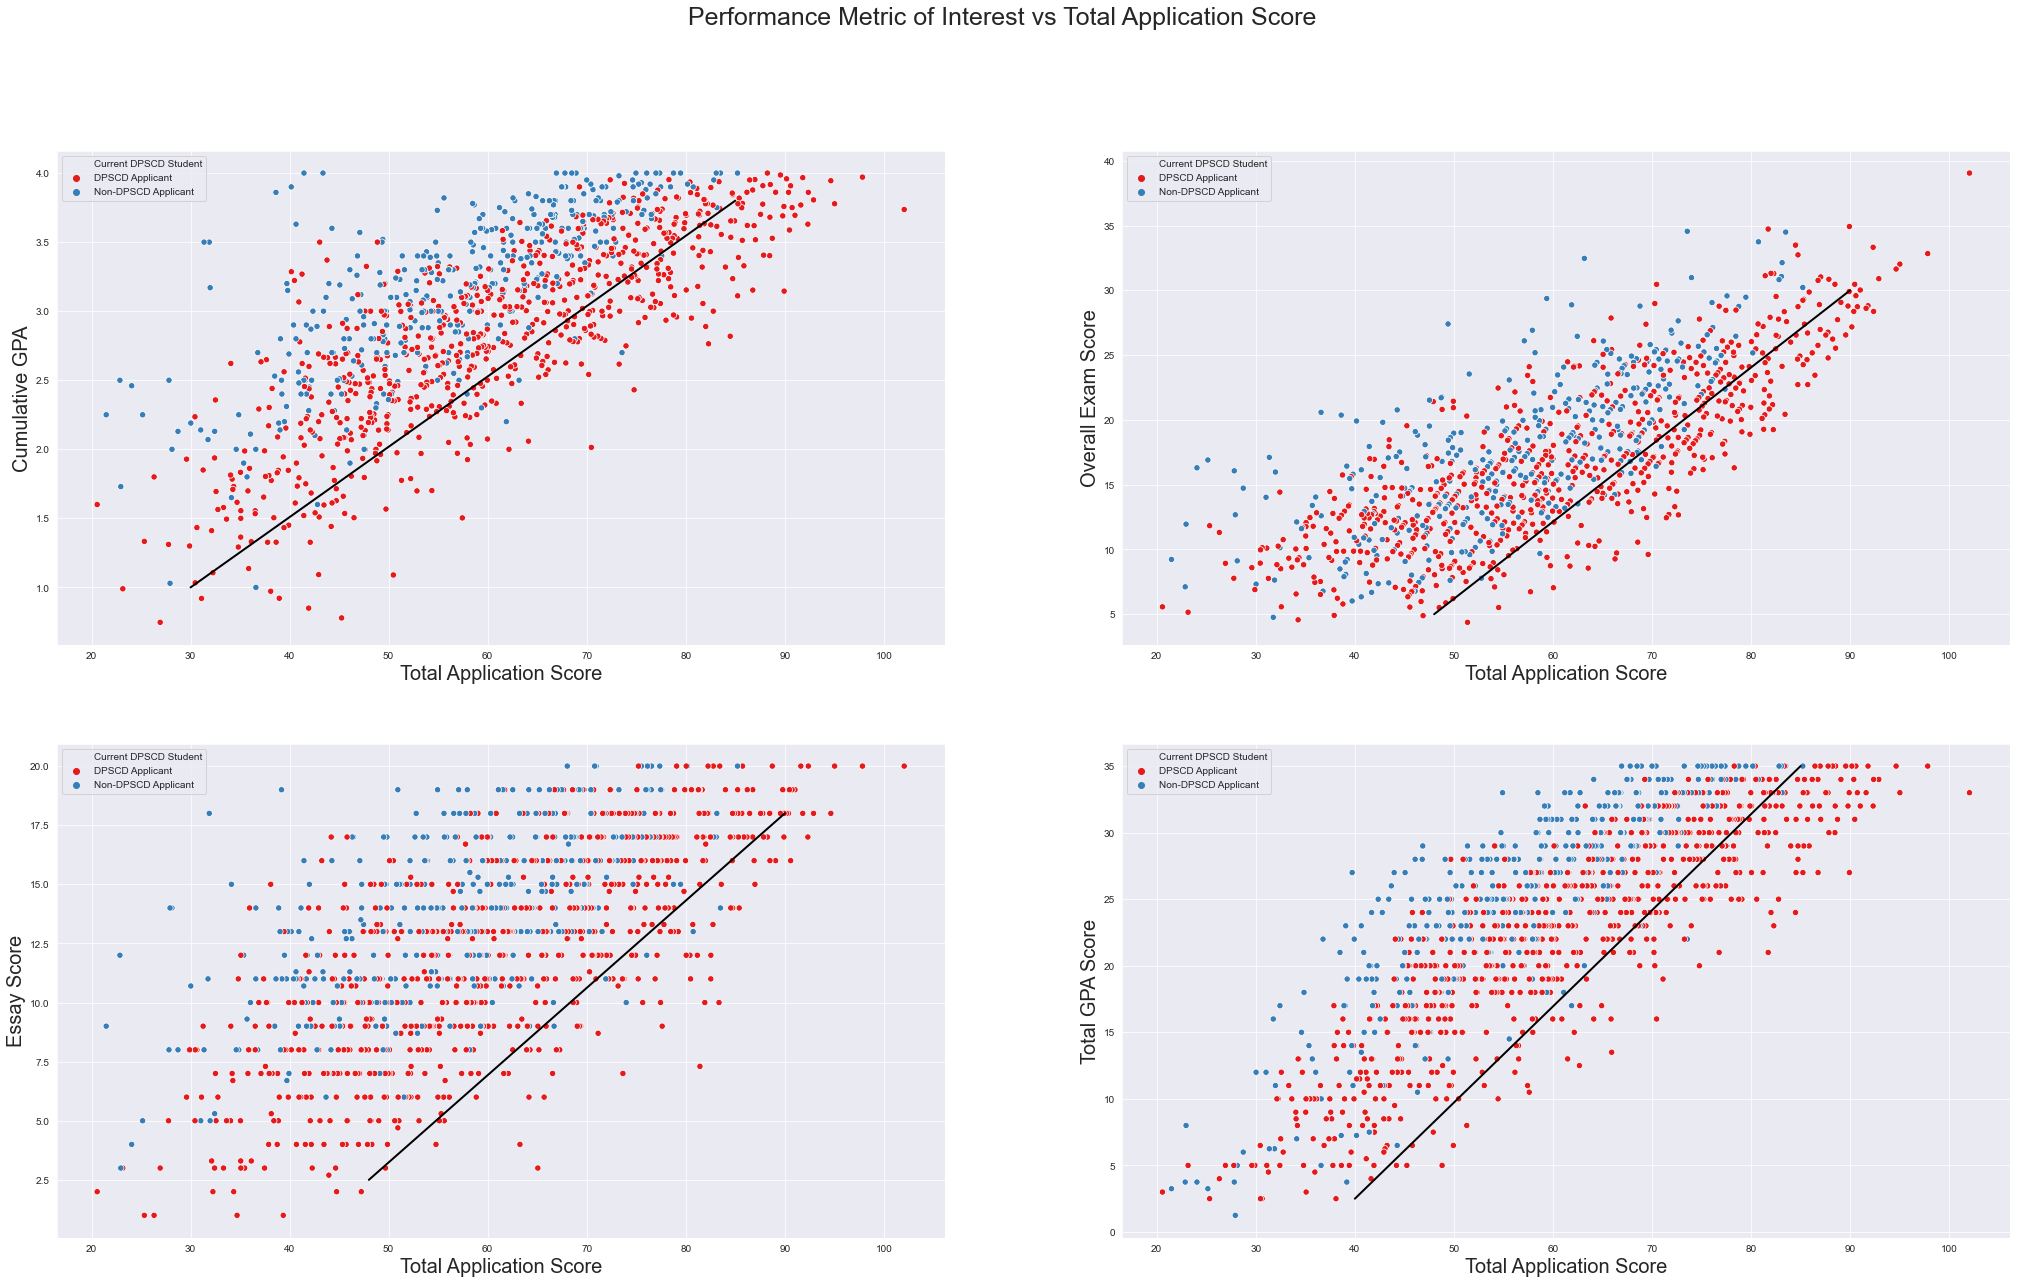

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(35, 20))
fig.suptitle('Performance Metric of Interest vs Total Application Score', fontsize=25)

c_gpa = sns.scatterplot(ax=axes[0, 0], x=concat['Total Application Score'], y=concat['Cumulative GPA'], hue="Current DPSCD Student", s=40, data=concat)
c_gpa.plot([30, 85], [1.0, 3.8], 'black', linewidth=2)
c_gpa.set_ylabel('Cumulative GPA', fontsize=20)
c_gpa.set_xlabel('Total Application Score', fontsize=20)

o_score = sns.scatterplot(ax=axes[0, 1], x=concat['Total Application Score'], y=concat['Overall Exam Score'], hue="Current DPSCD Student", s=40, data=concat)
o_score.plot([48, 90], [5, 30], 'black', linewidth=2)
o_score.set_ylabel('Overall Exam Score', fontsize=20)
o_score.set_xlabel('Total Application Score', fontsize=20)

e_score = sns.scatterplot(ax=axes[1, 0], x=concat['Total Application Score'], y=concat['Essay Score'], hue="Current DPSCD Student", s=40, data=concat)
e_score.plot([48, 90], [2.5, 18], 'black', linewidth=2)
e_score.set_ylabel('Essay Score', fontsize=20)
e_score.set_xlabel('Total Application Score', fontsize=20)

total_gpa = sns.scatterplot(ax=axes[1, 1], x=concat['Total Application Score'], y=concat['Total GPA Score'], hue="Current DPSCD Student", s=40, data=concat)
total_gpa.plot([40, 85], [2.5, 35], 'black', linewidth=2)
total_gpa.set_ylabel('Total GPA Score', fontsize=20)
total_gpa.set_xlabel('Total Application Score', fontsize=20)

In [6]:
concat_DPSCD = concat[~concat['Current DPSCD Student'].str.contains('Non', na=False)]
concat_nonDPSCD = concat[concat['Current DPSCD Student'].str.contains('Non-DPSCD Applicant', na=False)]

In [7]:
concat_DPSCD['Total Application Score'] -= 10

C:\Users\jwkon\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
minus_10_concat = pd.concat([concat_DPSCD, concat_nonDPSCD], axis=0)

In [9]:
minus_10_concat = minus_10_concat[~minus_10_concat.index.duplicated()]

Text(0.5, 0, '')

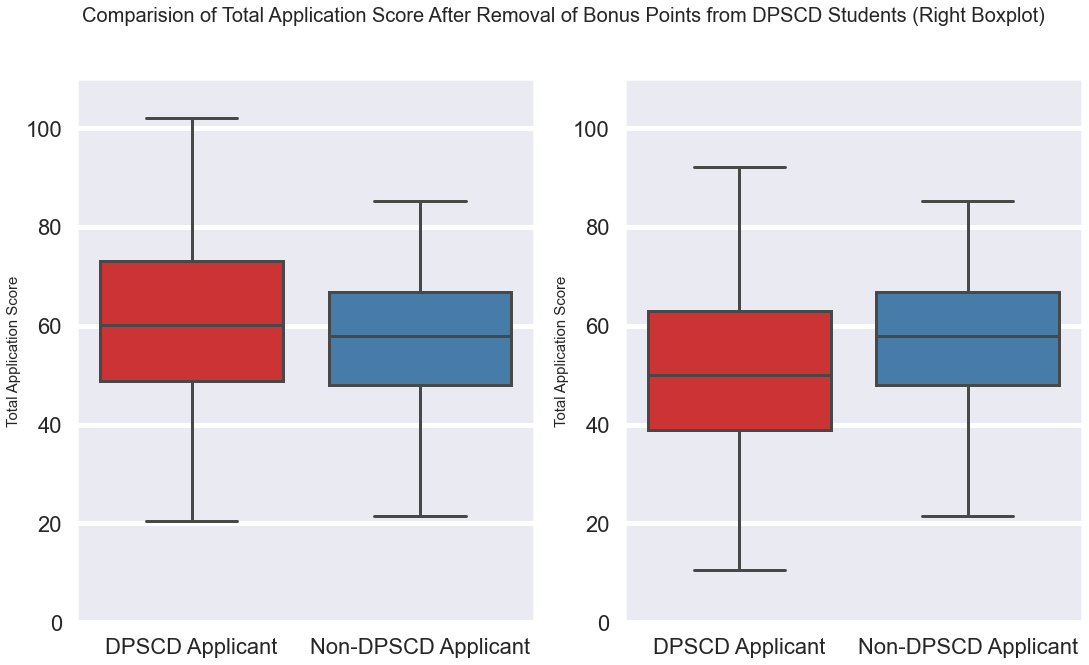

In [10]:
sns.set_context("poster", font_scale = 1, rc={"grid.linewidth": 5})
fig, axes = plt.subplots(1,2, figsize=(18, 10))
fig.suptitle('Comparision of Total Application Score After Removal of Bonus Points from DPSCD Students (Right Boxplot)', fontsize=20)

concat = sns.boxplot(ax=axes[0], data=concat, x='Current DPSCD Student', y='Total Application Score')
concat.set(ylim=(0, 110))
concat.set_ylabel('Total Application Score', fontsize=15)
concat.set_xlabel('')

minus_concat = sns.boxplot(ax=axes[1], data=minus_10_concat, x='Current DPSCD Student', y='Total Application Score')
minus_concat.set(ylim=(0, 110))
minus_concat.set_ylabel('Total Application Score', fontsize=15)
minus_concat.set_xlabel('')

## What performance metric is the most useful in contributing to a student's acceptance to their top choice school?

To accomplish this I will only focus on the applicants that were placed in their first and second choice school. The details in the logic of this decision can be explained during the interview.

I will import another .csv that has applicants that were placed in their first and second choice schools.

In [11]:
first_second = pd.read_csv('f_second.csv')

Create a new dataframe with columns of interest

In [12]:
first_second = pd.DataFrame(first_second, columns=['Application Status','Current DPSCD Student', 'Cumulative GPA', 'Overall Exam Score', 'Essay Score', 'Total GPA Score', 'Total Application Score', 'Rank of Applicants Final Placement'])

In [13]:
first_second.head(5)

,Application Status,Current DPSCD Student,Cumulative GPA,Overall Exam Score,Essay Score,Total GPA Score,Total Application Score,Rank of Applicants Final Placement
0,Accepted,DPSCD Applicant,3.73610,39.055924,20.0,33.0,102.055924,First
1,Accepted,DPSCD Applicant,3.97060,32.839648,20.0,35.0,97.839648,First
2,Accepted,DPSCD Applicant,3.77775,32.028559,20.0,33.0,95.028559,First
3,Accepted,DPSCD Applicant,3.94445,31.647674,18.0,35.0,94.647674,First
4,Accepted,DPSCD Applicant,3.80560,30.901489,18.0,34.0,92.901489,First


Create a set of dummy variables from the categorical data columns (will not include applcation status since it is redundant at this point).

In [14]:
first_second = pd.get_dummies(first_second, columns=['Current DPSCD Student', 'Rank of Applicants Final Placement'])

In [15]:
first_second.head(5)

,Application Status,Cumulative GPA,Overall Exam Score,Essay Score,Total GPA Score,Total Application Score,Current DPSCD Student_DPSCD Applicant,Current DPSCD Student_Non-DPSCD Applicant,Rank of Applicants Final Placement_First,Rank of Applicants Final Placement_Second
0,Accepted,3.73610,39.055924,20.0,33.0,102.055924,1,0,1,0
1,Accepted,3.97060,32.839648,20.0,35.0,97.839648,1,0,1,0
2,Accepted,3.77775,32.028559,20.0,33.0,95.028559,1,0,1,0
3,Accepted,3.94445,31.647674,18.0,35.0,94.647674,1,0,1,0
4,Accepted,3.80560,30.901489,18.0,34.0,92.901489,1,0,1,0


Drop **'Application Status'** and the two of the four new columns.

In [16]:
first_second = first_second.drop(['Application Status','Current DPSCD Student_Non-DPSCD Applicant', 'Rank of Applicants Final Placement_Second'], axis=1)

Rename the remaining two columns. In **'Current DPSCD Student'** a value of 1 will indicate the applicant is a student and in **'Placed in Top Choice School'** a value of 1 will indicate they did place in their top choice.

In [17]:
first_second = first_second.rename(columns={'Current DPSCD Student_DPSCD Applicant':'Current DPSCD Student','Rank of Applicants Final Placement_First': 'Placed in Top Choice School'})

In [18]:
first_second.describe()

,Cumulative GPA,Overall Exam Score,Essay Score,Total GPA Score,Total Application Score,Current DPSCD Student,Placed in Top Choice School
count,437.000000,438.000000,438.00000,438.000000,438.000000,438.000000,438.000000
mean,3.448158,22.258647,15.35000,29.477169,74.231935,0.714612,0.872146
std,0.368448,4.950532,3.06703,4.230696,7.661612,0.452116,0.334309
min,2.013850,9.613748,6.00000,5.000000,55.623596,0.000000,0.000000
25%,3.182200,18.727912,13.00000,27.000000,68.596185,0.000000,1.000000
50%,3.513150,22.193603,16.00000,30.000000,73.005254,1.000000,1.000000
75%,3.730000,25.250859,18.00000,33.000000,78.809410,1.000000,1.000000
max,4.000000,39.055924,20.00000,35.000000,102.055924,1.000000,1.000000


Verify there are no null values and drop any

In [19]:
first_second.isnull().sum()

Cumulative GPA                 1
Overall Exam Score             0
Essay Score                    0
Total GPA Score                0
Total Application Score        0
Current DPSCD Student          0
Placed in Top Choice School    0
dtype: int64

In [20]:
first_second = first_second.dropna(axis=0)

In [21]:
first_second['Placed in Top Choice School'].value_counts()

1    382
0     55
Name: Placed in Top Choice School, dtype: int64

# A logisic regression will be preformed.

An elimination method will be used on each regression, loosing an <i>independent variable</i> each time. 

 By this logic I will determine what Performance Metric has the greatest contribution in students acceptance to their top choice school.

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

## 1st Logistic Regression - Variables that will be used are 'Overall Exam Score, 'Essay Score', 'Total GPA Score', and 'Current DPSCD Student'.)

Set our independent variables (x_one) and dependent variables (y_one).

In [23]:
x_one = first_second[['Overall Exam Score', 'Essay Score', 'Total GPA Score', 'Current DPSCD Student']]
y_one = first_second['Placed in Top Choice School']

There are 437 applicants in this dataframe. I will prase the data into categories and sizes termed 'test' (25%) and 'training' (remaining 75%) by applying **train_test_split** function.

In [24]:
X_train,X_test,y_train,y_test = train_test_split(x_one,y_one,test_size=0.25,random_state=0)

Run the regression

In [25]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

Display a Confusion Matrix. A Confusion Matrix allows visualization of how well an algorithm performs (For this purpose the algorithm is our LogisicRegression that was ran above). 
* Top Left - 7; meaning 7 positive classes (Placed in Top Choice School) were classified correctly 
* Bottom Right - 94; meaning 94 negative classes (Placed in Second Choice School) were classified correctly
* Top Right - 8; meaning 8 negative classes were incorretly classified
* Bottom Left - 2; meaning 2 positive class was incorrectly classified

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

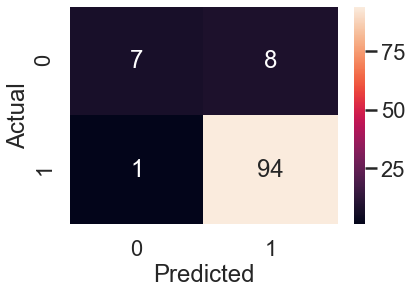

In [26]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [27]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.9181818181818182


## 2rd Logistic Regression (Remove **Current DPSCD Student**)

In [28]:
x_two = first_second[['Overall Exam Score', 'Essay Score', 'Total GPA Score']]
y_two = first_second['Placed in Top Choice School']

In [29]:
X_train,X_test,y_train,y_test = train_test_split(x_two,y_two,test_size=0.25,random_state=0)

In [30]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

Display a Confusion Matrix. A Confusion Matrix allows visualization of how well an algorithm performs (For this purpose the algorithm is our LogisicRegression that was ran above). 
* Top Left - 6; meaning 6 positive classes (Placed in Top Choice School) were classified correctly 
* Bottom Right - 94; meaning 94 negative classes (Placed in Second Choice School) were classified correctly
* Top Right - 9; meaning 9 negative classes were incorretly classified
* Bottom Left - 1; meaning 1 positive class was incorrectly classified

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

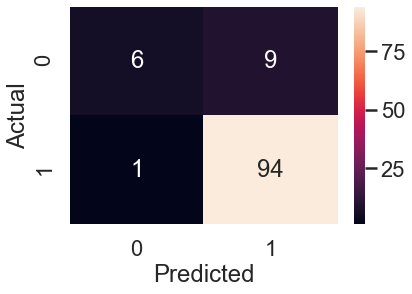

In [31]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [32]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.9090909090909091


## 3rd Logistic Regression (Remove **Total GPA Score**)

In [33]:
x_three = first_second[['Essay Score', 'Overall Exam Score', 'Current DPSCD Student']]
y_three = first_second['Placed in Top Choice School']

In [34]:
X_train,X_test,y_train,y_test = train_test_split(x_three, y_three, test_size=0.25,random_state=0)

In [35]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

Display a Confusion Matrix. A Confusion Matrix allows visualization of how well an algorithm performs (For this purpose the algorithm is our LogisicRegression that was ran above). 
* Top Left - 4; meaning 4 positive classes (Placed in Top Choice School) were classified correctly 
* Bottom Right - 93; meaning 93 negative classes (Placed in Second Choice School) were classified correctly
* Top Right - 11; meaning 11 negative classes were incorretly classified
* Bottom Left - 2; meaning 2 positive class was incorrectly classified

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

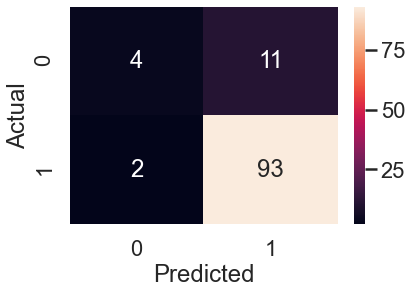

In [36]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [37]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.8818181818181818


## 4th Logistic Regression (Remove **Overall Exam Score**)

In [38]:
x_four = first_second[['Essay Score', 'Total GPA Score', 'Current DPSCD Student']]
y_four = first_second['Placed in Top Choice School']

In [39]:
X_train,X_test,y_train,y_test = train_test_split(x_four, y_four, test_size=0.25,random_state=0)

In [40]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

Display a Confusion Matrix. A Confusion Matrix allows visualization of how well an algorithm performs (For this purpose the algorithm is our LogisicRegression that was ran above). 
* Top Left - 2; meaning 2 positive classes (Placed in Top Choice School) were classified correctly 
* Bottom Right - 93 meaning 93 negative classes (Placed in Second Choice School) were classified correctly
* Top Right - 13; meaning 13 negative classes were incorretly classified
* Bottom Left - 2; meaning 2 positive class was incorrectly classified

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

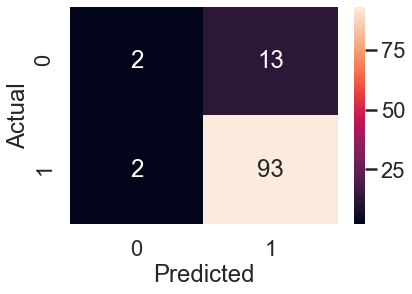

In [41]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [42]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.8636363636363636


## 5th Logistic Regression (Remove **Essay Score**)

In [43]:
x_five = first_second[['Overall Exam Score', 'Total GPA Score', 'Current DPSCD Student']]
y_five = first_second['Placed in Top Choice School']

In [44]:
X_train,X_test,y_train,y_test = train_test_split(x_five, y_five, test_size=0.25,random_state=0)

In [45]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

Display a Confusion Matrix. A Confusion Matrix allows visualization of how well an algorithm performs (For this purpose the algorithm is our LogisicRegression that was ran above). 
* Top Left - 5; meaning 5 positive classes (Placed in Top Choice School) were classified correctly 
* Bottom Right - 94; meaning 94 negative classes (Placed in Second Choice School) were classified correctly
* Top Right - 10; meaning 10 negative classes were incorretly classified
* Bottom Left - 1; meaning 1 positive class was incorrectly classified

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

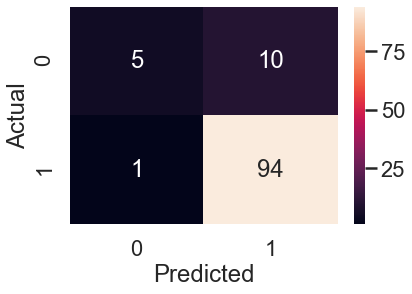

In [46]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [47]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.9
